<a href="https://colab.research.google.com/github/svenkatlata/Machine_Learning_Revision_Notes/blob/main/Exploratory_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Cleaning Activities:

1. Fix Rows and Columns
2. Fix Missing Values
3. Standardize Values
4. Fix Invalid Values
5. Filter Data


## Data Cleaning Checklist

### 1. Fix Rows and Columns

| **Data quality issue**                | **Examples**                                                   | **How to resolve**                                                                 |
|---------------------------------------|---------------------------------------------------------------|-----------------------------------------------------------------------------------|
| Incorrect rows                        | Header rows, footer rows                                       | Delete                                                                            |
| Summary rows                          | Total, subtotal rows                                           | Delete                                                                            |
| Extra rows                            | Column numbers, indicators, blank rows                         | Delete                                                                            |
| Missing Column Names                  | Column names as blanks, NA, XX etc.                            | Add the column names                                                              |
| Inconsistent column names             | X1, X2, C4 which give no information about the column          | Add column names that give some information about the data                        |
| Unnecessary columns                   | Unidentified columns, irrelevant columns, blank columns        | Delete                                                                            |
| Columns containing Multiple data values | E.g. address columns containing city, state, country           | Split columns into components                                                    |
| No Unique Identifier                  | E.g. Multiple cities with the same name in a column            | Combine columns to create unique identifiers (e.g., combine City with State)      |
| Misaligned columns                    | Shifted columns                                                | Align these columns                                                               |

---

### 2. Missing Values

| **Data quality issue**                | **Examples**                                                   | **How to resolve**                                                                 |
|---------------------------------------|---------------------------------------------------------------|-----------------------------------------------------------------------------------|
| Disguised Missing values              | Blank strings, "NA", "XX", "999", etc.                         | Set values as missing values                                                      |
| Significant number of Missing values  | -                                                             | Delete rows, columns                                                              |
| Partial missing values                | Missing time zone, century, etc.                              | Fill the missing values with the correct value                                    |

---

### 3.1. Standardise Numbers

| **Data quality issue**                | **Examples**                                                   | **How to resolve**                                                                 |
|---------------------------------------|---------------------------------------------------------------|-----------------------------------------------------------------------------------|
| Non-standard units                    | Convert lbs to kgs, miles/hr to km/hr                          | Standardise the observations so all of them have consistent units                 |
| Values with varying Scales            | Marks in subjects, with some out of 50 and others out of 100   | Make the scale common (e.g., a percentage scale)                                  |
| Over-precision                        | 4.5312341 kgs, 9.323252 meters                                 | Standardise precision for better presentation of data                             |
| Remove outliers                       | Abnormally High and Low values                                 | Correct if by mistake, else Remove                                                |

---

### 3.2. Standardise Text

| **Data quality issue**                | **Examples**                                                   | **How to resolve**                                                                 |
|---------------------------------------|---------------------------------------------------------------|-----------------------------------------------------------------------------------|
| Extra characters                      | Common prefix/suffix, leading/trailing/multiple spaces         | Remove the extra characters                                                       |
| Different cases of same words         | Uppercase, lowercase, Title Case, Sentence case, etc.          | Standardise the case/bring to a common case                                       |
| Non-standard formats                  | `23/10/16` to `2016/10/20`, `“Modi, Narendra"` to `"Narendra Modi"` | Correct the format/Standardise format for better readability                      |

---

### 4. Fix Invalid Values

| **Data quality issue**                | **Examples**                                                   | **How to resolve**                                                                 |
|---------------------------------------|---------------------------------------------------------------|-----------------------------------------------------------------------------------|
| Encoding Issues                       | CP1252 instead of UTF-8                                        | Encode Unicode properly                                                           |
| Incorrect data types                  | Number stored as a string: "12,300"                            | Convert to Correct data type                                                      |
|                                       | Date stored as a string: "2013-Aug"                            |                                                                                   |
|                                       | String stored as a number: PIN Code "110001" stored as 110001  |                                                                                   |
| Correct values not in list            | Non-existent country, PIN code                                 | Delete the invalid values, treat as Missing                                       |
| Wrong structure                       | Phone number with over 10 digits                               | Delete the invalid values, treat as Missing                                       |
| Correct values beyond range           | Temperature less than -273° C (0° K)                           | Delete the invalid values, treat as Missing                                       |
| Validate internal rules               | Gross sales > Net sales                                | Delete the invalid values, treat as Missing                                       |
|                                       | Date of delivery > Date of ordering                            |                                                                                   |
|                                       | If Title is "Mr" then Gender is "M"  |                                                                                   |

---

### 5. Filter Data

| **Data quality issue**                | **Examples**                                                   | **How to resolve**                                                                 |
|---------------------------------------|---------------------------------------------------------------|-----------------------------------------------------------------------------------|
| Duplicate data                        | Identical rows, rows where some columns are identical          | Deduplicate Data/ Remove duplicated data                                          |
| Extra/Unnecessary rows                | Rows not required for analysis                                 | Filter rows to keep only the relevant data                                        |
| Columns not relevant to analysis      | Personal Detail columns (e.g., Address, phone column)          | Filter columns - Pick columns relevant to analysis                                |
| Dispersed data                        | Data stored in different files or datasets                     | Bring the data together, Group by required keys, aggregate the rest               |


https://pandas.pydata.org/pandas-docs/stable/user_guide/missing_data.html

https://www.kdnuggets.com/2017/02/removing-outliers-standard-deviation-python.html


---

### Invalid Values Checklist

#### 1. Encode Unicode Properly
In case the data is being read as junk characters, try to change the encoding.  
**Example:** CP1252 instead of UTF-8.

#### 2. Convert Incorrect Data Types
Correct the incorrect data types to the correct data types for ease of analysis.  
**Example:**
- Numeric values stored as strings: `"12,300"` to `12300`
- String to date: `"2013-Aug"` to `2013/08`
- Number to string: `"PIN Code 110001"` to `"110001"`

If incorrect data types are not fixed, it would not be possible to calculate metrics such as mean, median, etc.

#### 3. Correct Values Beyond Range
If some values are beyond logical ranges, they should be corrected.  
**Example:** Temperature less than `-273°C` (0 K).  
Take a closer look to decide if there is scope for correction, or if the value needs to be removed.

#### 4. Correct Values Not in the List
Remove values that don’t belong to a predefined list.  
**Example:**  
In a dataset containing blood groups, invalid strings like `"E"` or `"F"` can be removed.

#### 5. Correct Wrong Structure
Values that don’t follow a defined structure can be removed.  
**Examples:**  
- A pin code of 12 digits in a dataset of Indian cities is invalid and needs to be removed.
- A phone number of 12 digits is invalid and should be corrected.

#### 6. Validate Internal Rules
Ensure internal rules in the dataset are correct and consistent.  
**Examples:**
- A date of a product’s delivery must be after the date of the order.
- Gross sales should be greater than net sales.

In [1]:
# Step 1: Load Required Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

In [2]:
# Step 2: Load the Dataset
iris = load_iris()
data = pd.DataFrame(
    data=np.c_[iris['data'], iris['target']],
    columns=iris['feature_names'] + ['target']
)

In [3]:
# Step 3: Basic Information
# Display first few rows of the dataset
print(data.head())

# Dataset shape (rows, columns)
print("Shape of dataset:", data.shape)

# Data types of each column
print("Data types:\n", data.dtypes)

# Summary statistics for numerical columns
print("Summary statistics:\n", data.describe())

# Check for missing values
print("Missing values:\n", data.isnull().sum())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  
0     0.0  
1     0.0  
2     0.0  
3     0.0  
4     0.0  
Shape of dataset: (150, 5)
Data types:
 sepal length (cm)    float64
sepal width (cm)     float64
petal length (cm)    float64
petal width (cm)     float64
target               float64
dtype: object
Summary statistics:
        sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.43

In [4]:
# Step 4: Data Visualization

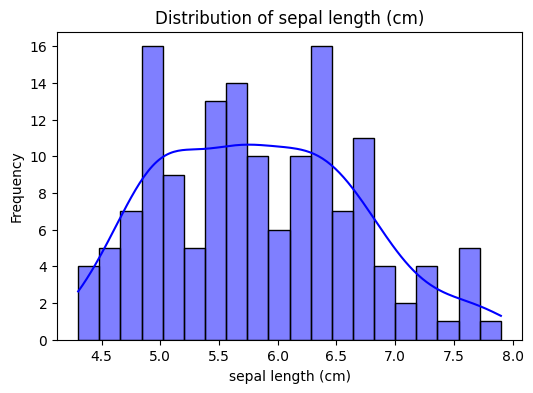

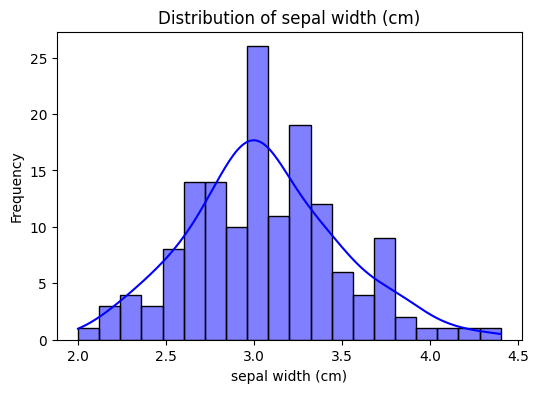

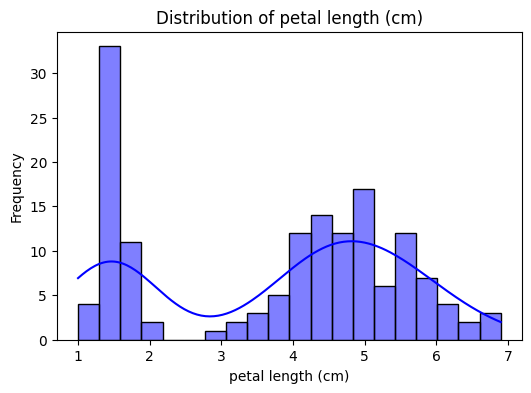

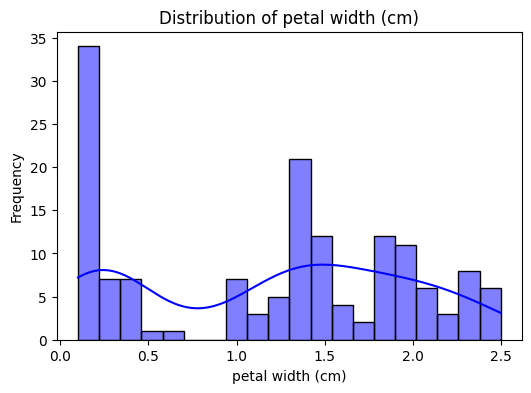

In [5]:
## Univariate Analysis
# Distribution of each numerical feature
for col in iris['feature_names']:
    plt.figure(figsize=(6, 4))
    sns.histplot(data[col], kde=True, bins=20, color='blue')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

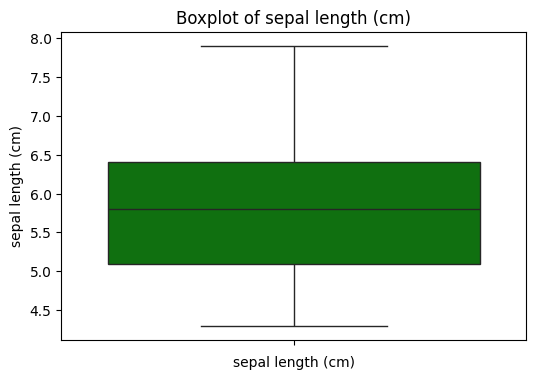

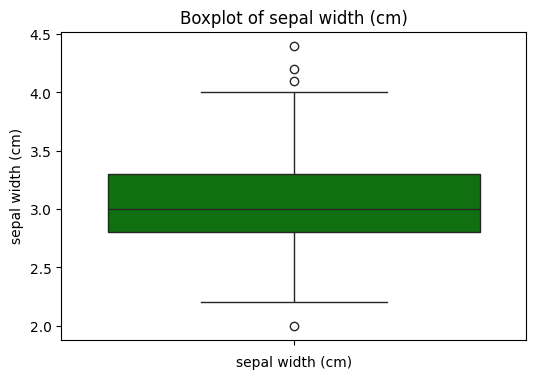

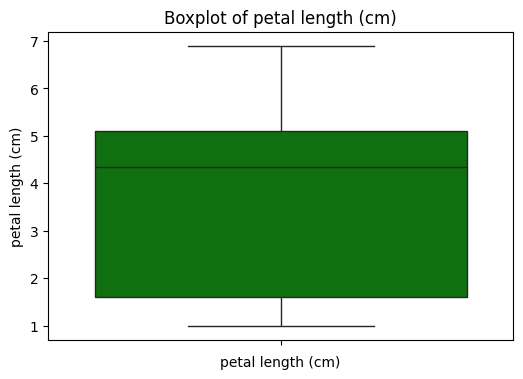

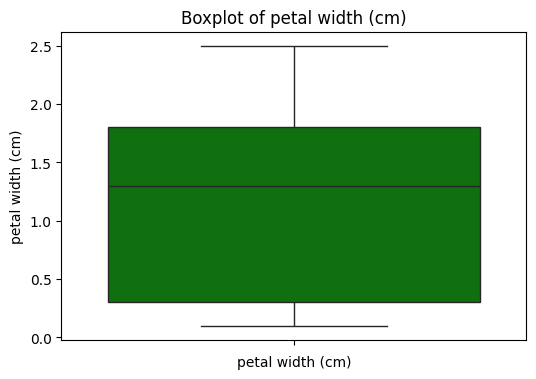

In [6]:
# Boxplots for each feature
for col in iris['feature_names']:
    plt.figure(figsize=(6, 4))
    sns.boxplot(data[col], color='green')
    plt.title(f'Boxplot of {col}')
    plt.xlabel(col)
    plt.show()

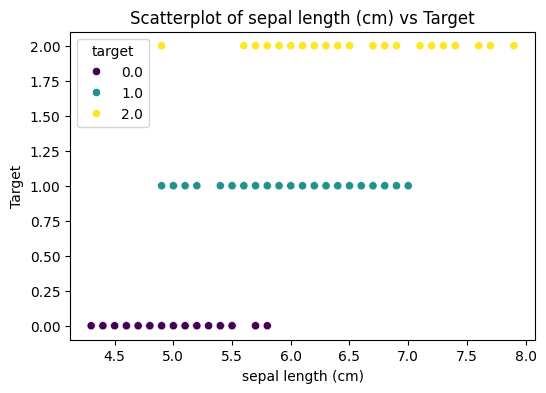

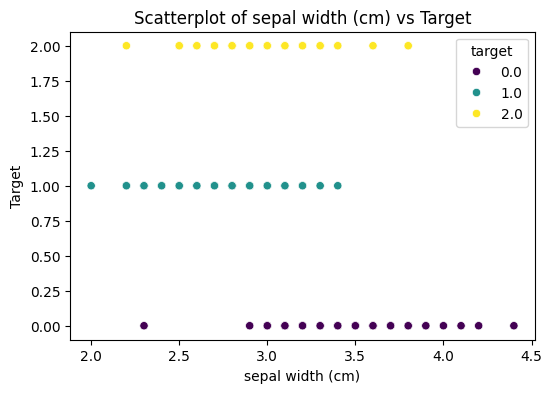

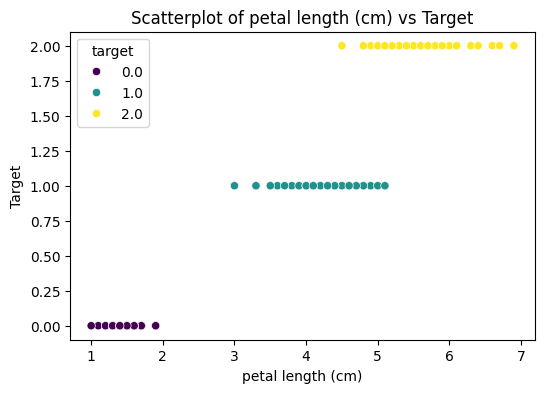

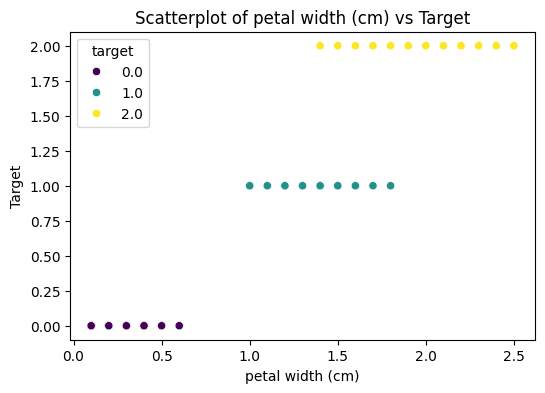

In [7]:
## Bivariate Analysis
# Scatterplots for each feature against the target
for col in iris['feature_names']:
    plt.figure(figsize=(6, 4))
    sns.scatterplot(x=col, y='target', data=data, hue='target', palette='viridis')
    plt.title(f'Scatterplot of {col} vs Target')
    plt.xlabel(col)
    plt.ylabel('Target')
    plt.show()

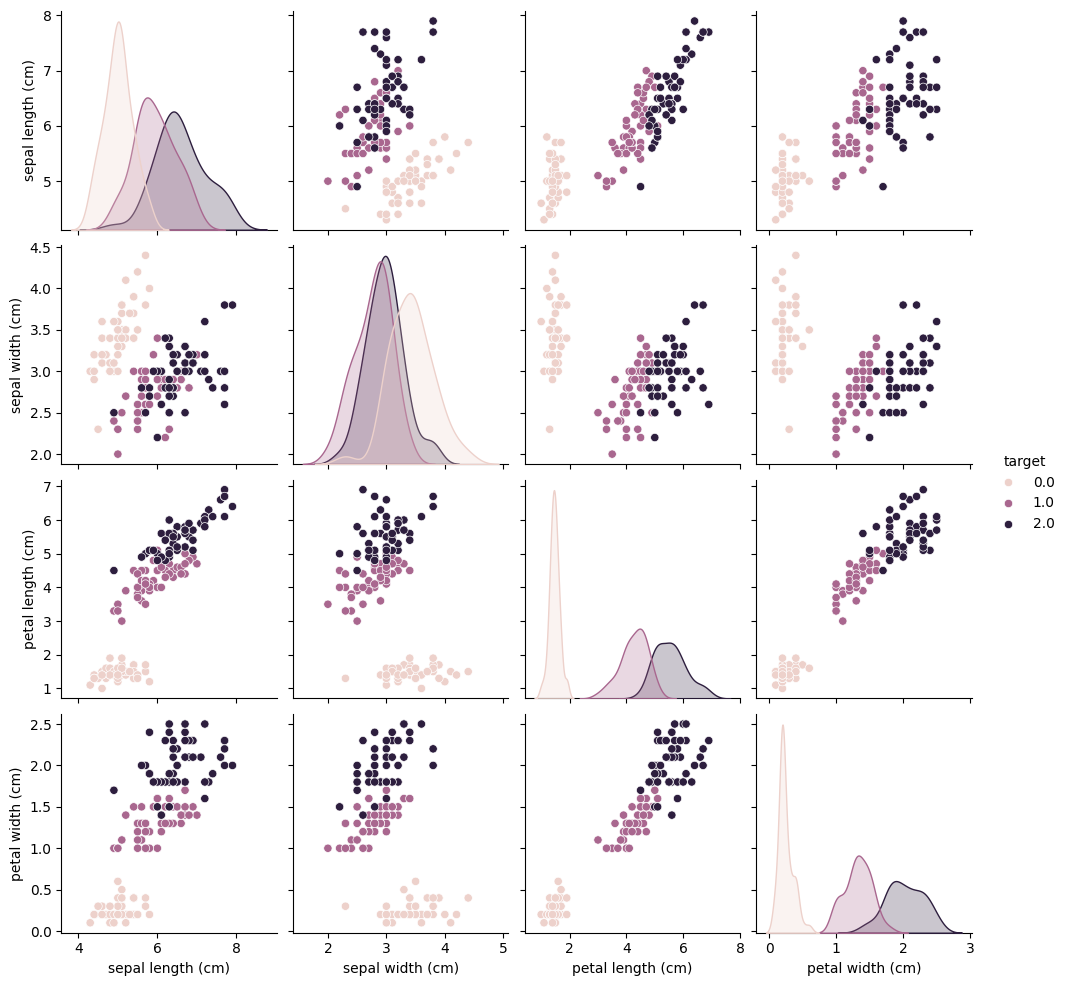

In [8]:
# Pairplot to visualize relationships between features
sns.pairplot(data, hue='target', diag_kind='kde')
plt.show()

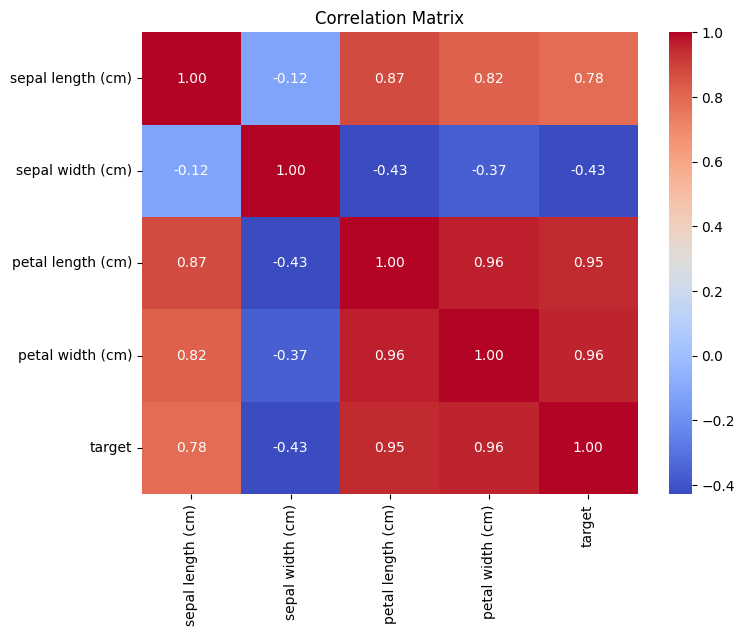

In [9]:
# Correlation matrix heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

<ipython-input-10-8d81dde9c722>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='target', y=col, data=data, palette='Set2')


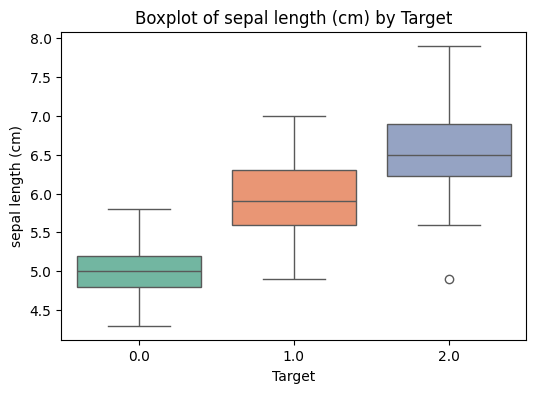

<ipython-input-10-8d81dde9c722>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='target', y=col, data=data, palette='Set2')


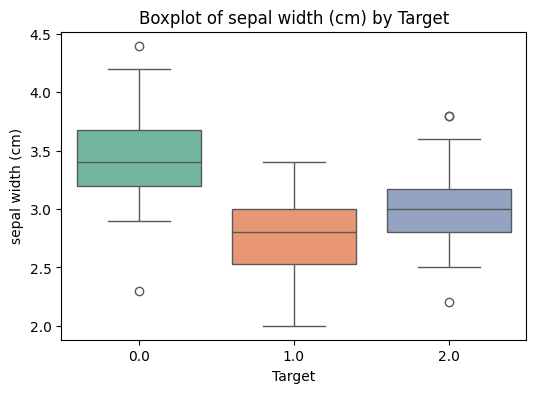

<ipython-input-10-8d81dde9c722>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='target', y=col, data=data, palette='Set2')


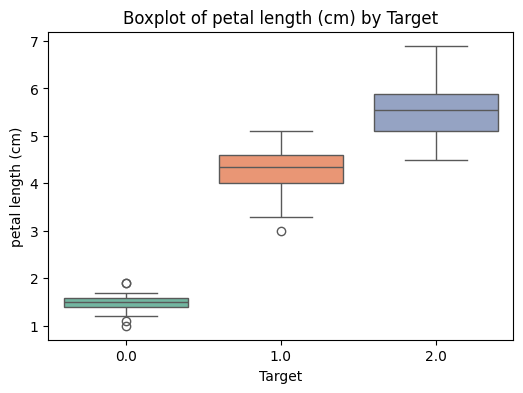

<ipython-input-10-8d81dde9c722>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='target', y=col, data=data, palette='Set2')


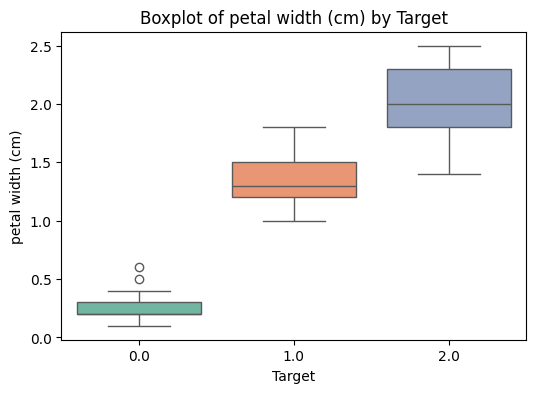

In [10]:
## Segmented Analysis
# Boxplot for each feature grouped by target
for col in iris['feature_names']:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x='target', y=col, data=data, palette='Set2')
    plt.title(f'Boxplot of {col} by Target')
    plt.xlabel('Target')
    plt.ylabel(col)
    plt.show()

<ipython-input-11-624ff8c55dbd>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='target', y=col, data=data, palette='muted')


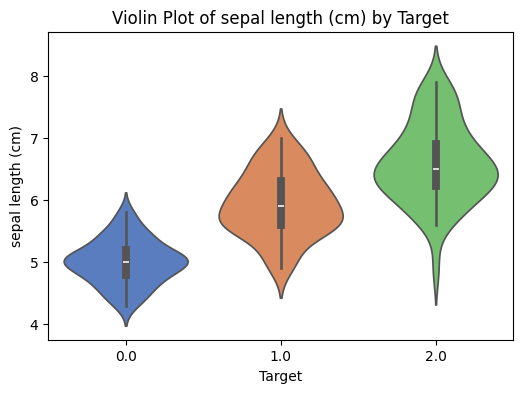

<ipython-input-11-624ff8c55dbd>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='target', y=col, data=data, palette='muted')


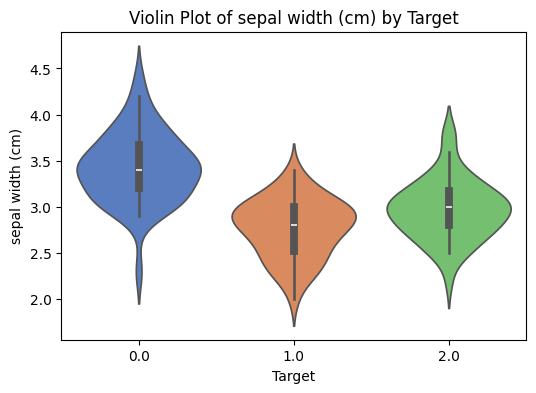

<ipython-input-11-624ff8c55dbd>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='target', y=col, data=data, palette='muted')


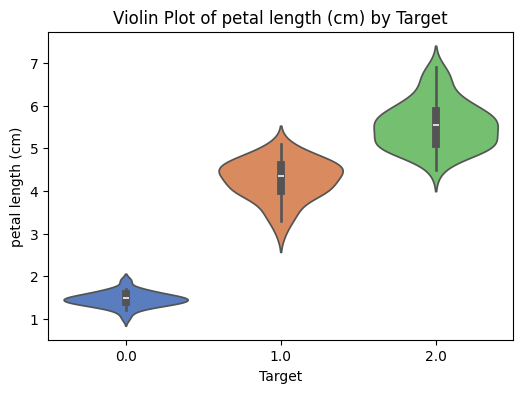

<ipython-input-11-624ff8c55dbd>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='target', y=col, data=data, palette='muted')


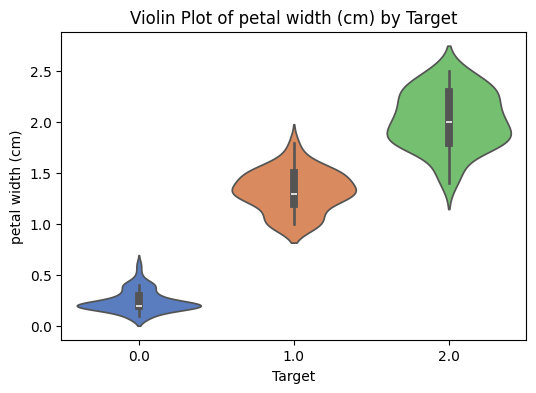

In [11]:
# Violin plot to observe distribution and density grouped by target
for col in iris['feature_names']:
    plt.figure(figsize=(6, 4))
    sns.violinplot(x='target', y=col, data=data, palette='muted')
    plt.title(f'Violin Plot of {col} by Target')
    plt.xlabel('Target')
    plt.ylabel(col)
    plt.show()

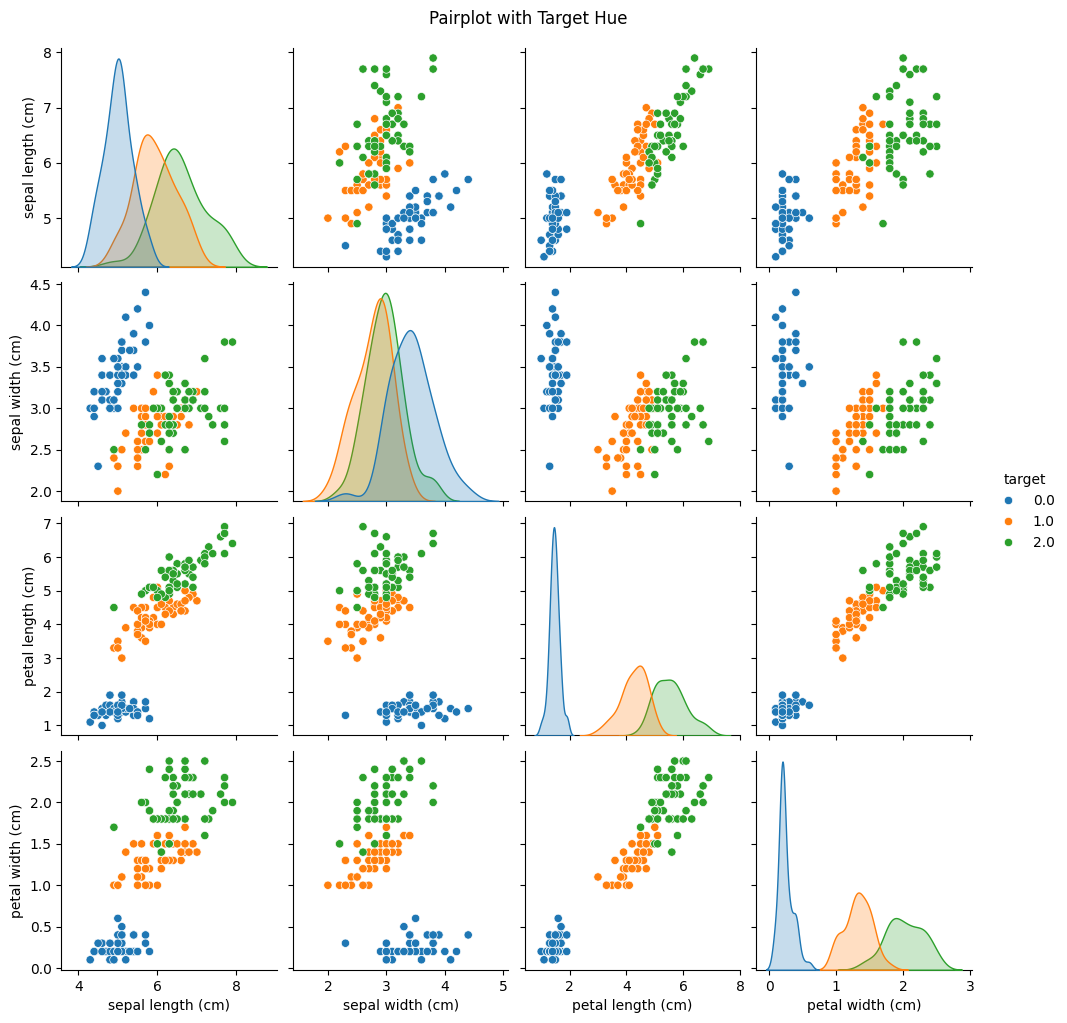

In [12]:
## Multivariate Analysis
# Pairplot with KDE for diagonal and hue by target
sns.pairplot(data, hue='target', diag_kind='kde', palette='tab10')
plt.suptitle('Pairplot with Target Hue', y=1.02)
plt.show()

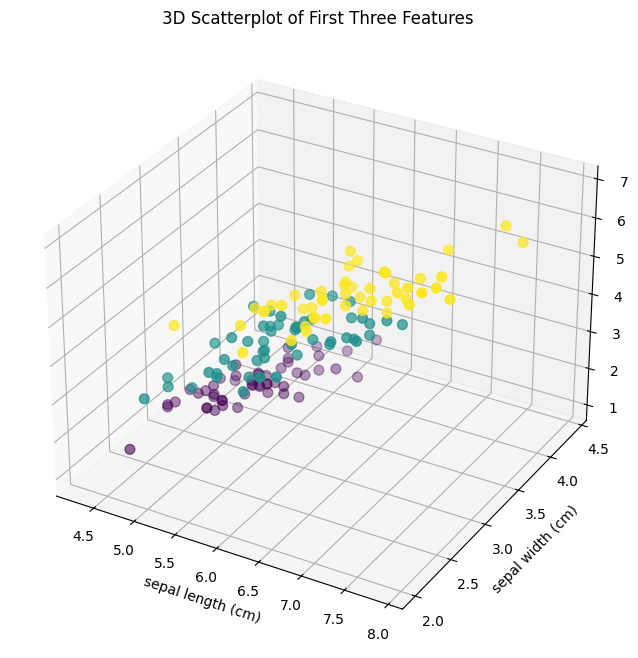

In [13]:
# 3D Scatter Plot (if matplotlib 3D is available)
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data.iloc[:, 0], data.iloc[:, 1], data.iloc[:, 2], c=data['target'], cmap='viridis', s=50)
ax.set_title('3D Scatterplot of First Three Features')
ax.set_xlabel(iris['feature_names'][0])
ax.set_ylabel(iris['feature_names'][1])
ax.set_zlabel(iris['feature_names'][2])
plt.show()

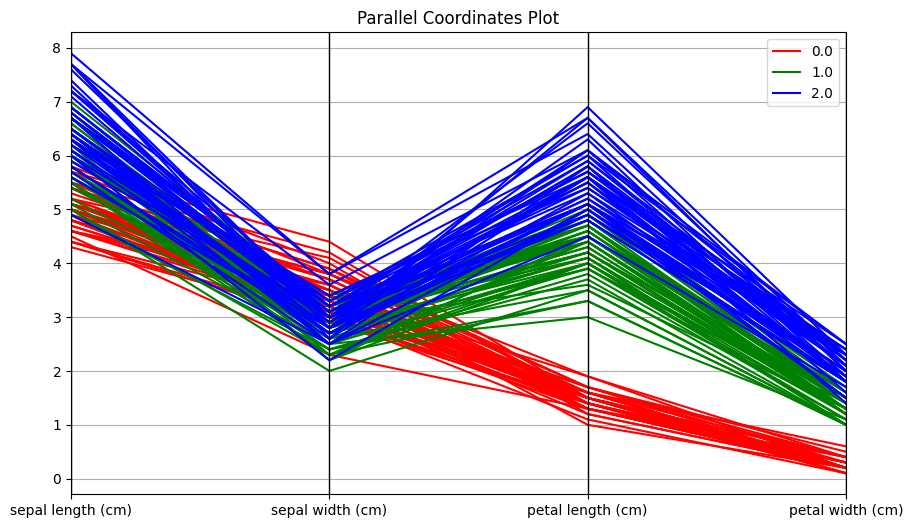

In [14]:
# Parallel Coordinates Plot
from pandas.plotting import parallel_coordinates
parallel_data = data.copy()
parallel_data['target'] = parallel_data['target'].astype(str)
plt.figure(figsize=(10, 6))
parallel_coordinates(parallel_data, 'target', color=['r', 'g', 'b'])
plt.title('Parallel Coordinates Plot')
plt.show()

In [15]:
# Check for outliers using IQR
for col in iris['feature_names']:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    outliers = ((data[col] < (Q1 - 1.5 * IQR)) | (data[col] > (Q3 + 1.5 * IQR))).sum()
    print(f'Outliers in {col}: {outliers}')

Outliers in sepal length (cm): 0
Outliers in sepal width (cm): 4
Outliers in petal length (cm): 0
Outliers in petal width (cm): 0
